# Exploratory data analysis full pipeline. RandomForestClassifier 

In [13]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics  import accuracy_score, precision_score, recall_score

In [59]:
# Import dataset
titanic = pd.read_csv("C:\\Users\\Asus\\Downloads\\titanic\\train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1. Analyse continious features

In [60]:
cont_features = ['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
train_con = titanic.drop(cont_features , axis=1, inplace=False)

In [61]:
train_con.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [62]:
train_con.groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


In [64]:
train_con.groupby(train_con['Age'].isnull()).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


## Plot Continuous Features

C:\Users\Asus\AppData\Local\Temp\ipykernel_21216\725071931.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(died, color='r', kde=False, bins=np.arange(xmin, xmax, width))
C:\Users\Asus\AppData\Local\Temp\ipykernel_21216\725071931.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(survived, c

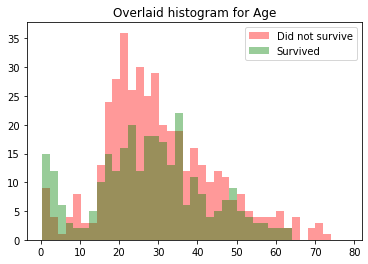

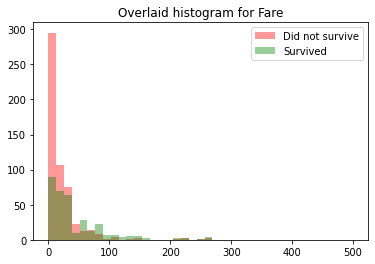

In [67]:
for i in ['Age', 'Fare']:
  died = list(train_con[train_con['Survived'] == 0][i].dropna())
  survived = list(train_con[train_con['Survived'] == 1][i].dropna())
  xmin = min(min(died), min(survived))
  xmax = max(max(died), max(survived))
  width = (xmax - xmin) / 40
  sns.distplot(died, color='r', kde=False, bins=np.arange(xmin, xmax, width))
  sns.distplot(survived, color='g', kde=False, bins=np.arange(xmin, xmax, width))
  plt.legend(['Did not survive', 'Survived'])
  plt.title('Overlaid histogram for {}'.format(i))
  plt.show()

<Figure size 432x288 with 0 Axes>

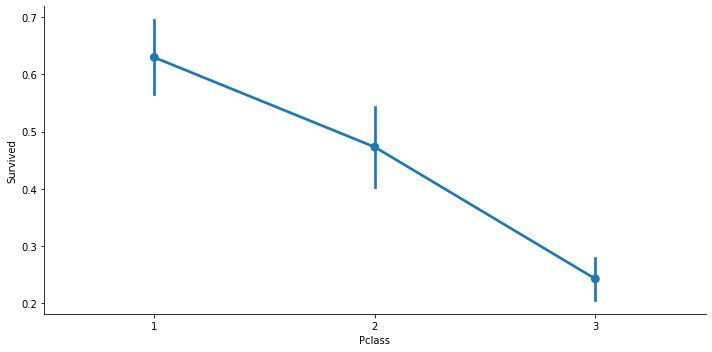

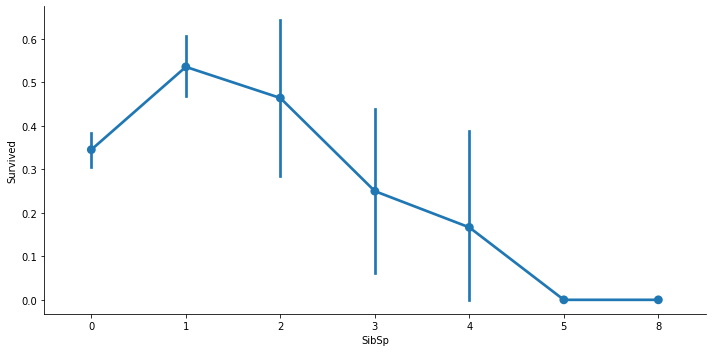

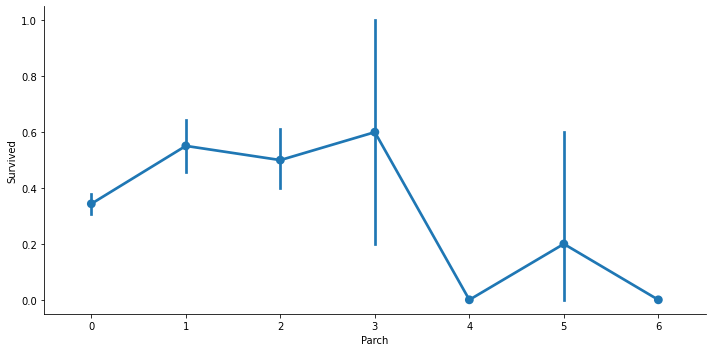

In [68]:
for i, col in enumerate(['Pclass', 'SibSp', 'Parch']):
  plt.figure(i)
  sns.catplot(x=col, y='Survived', data=train_con, kind='point', aspect=2)

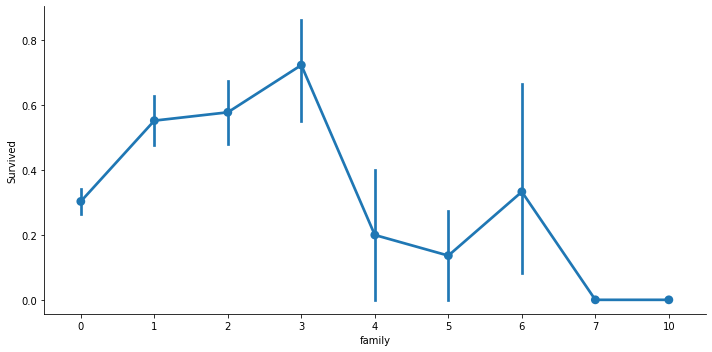

In [69]:
# Combine SibSp & Parch
train_con['family'] = train_con['SibSp'] + train_con['Parch']
sns.catplot(x='family', y='Survived', data=train_con, kind='point', aspect=2,)

In [70]:
train_con.isnull().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
family        0
dtype: int64

## 2. Analyse categorical features

In [73]:
con_features = ['PassengerId', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Fare']
train_cat = titanic.drop(con_features, axis=1, inplace=False)
train_cat.head()

,Survived,Sex,Ticket,Cabin,Embarked
0,0,male,A/5 21171,NaN,S
1,1,female,PC 17599,C85,C
2,1,female,STON/O2. 3101282,NaN,S
3,1,female,113803,C123,S
4,0,male,373450,NaN,S


In [74]:
train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Sex       891 non-null    object
 2   Ticket    891 non-null    object
 3   Cabin     204 non-null    object
 4   Embarked  889 non-null    object
dtypes: int64(1), object(4)
memory usage: 34.9+ KB


In [76]:
train_cat.groupby(train_cat['Cabin'].isnull()).mean()

C:\Users\Asus\AppData\Local\Temp\ipykernel_21216\1749348279.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train_cat.groupby(train_cat['Cabin'].isnull()).mean()


,Survived
Cabin,
False,0.666667
True,0.299854


In [77]:
train_cat['Cabin_indicator'] = np.where(train_cat['Cabin'].isnull(), 0, 1)
train_cat.head(10)

,Survived,Sex,Ticket,Cabin,Embarked,Cabin_indicator
0,0,male,A/5 21171,NaN,S,0
1,1,female,PC 17599,C85,C,1
2,1,female,STON/O2. 3101282,NaN,S,0
3,1,female,113803,C123,S,1
4,0,male,373450,NaN,S,0
5,0,male,330877,NaN,Q,0
6,0,male,17463,E46,S,1
7,0,male,349909,NaN,S,0
8,1,female,347742,NaN,S,0
9,1,female,237736,NaN,C,0


<Figure size 432x288 with 0 Axes>

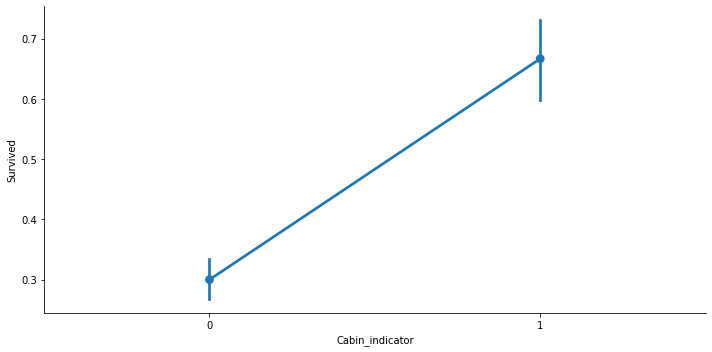

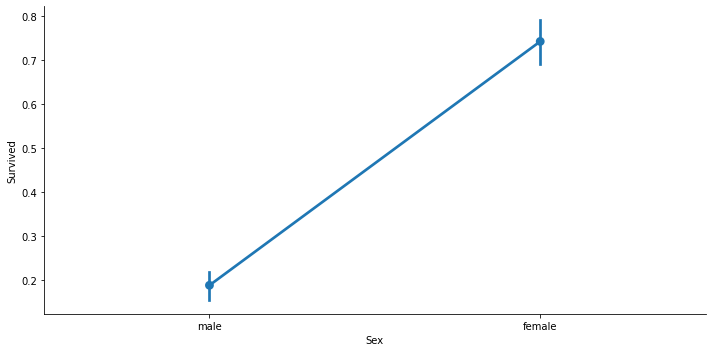

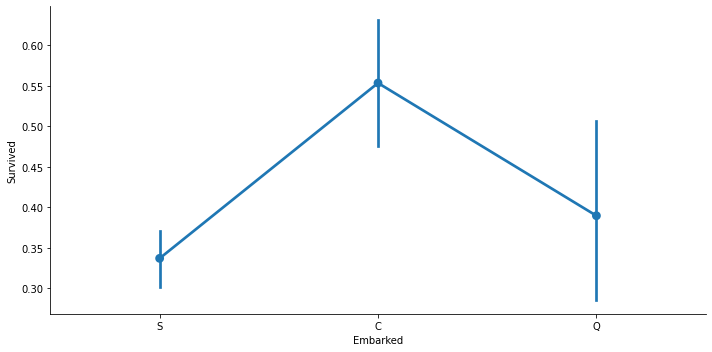

In [78]:
for i, col in enumerate(['Cabin_indicator', 'Sex', 'Embarked']):
  plt.figure(i)
  sns.catplot(x=col, y='Survived', data=train_cat, kind='point', aspect=2,)

In [79]:
train_cat.pivot_table('Survived', index='Sex', columns='Embarked', aggfunc='count')

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


In [80]:
train_cat.pivot_table('Survived', index='Cabin_indicator', columns='Embarked', aggfunc='count')

Embarked,C,Q,S
Cabin_indicator,,,
0,99,73,515
1,69,4,129


## Cleaning data

In [81]:
# Count missing values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [34]:
# Fill missing values
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

In [35]:
titanic['Family_count'] = titanic['SibSp'] + titanic['Parch']
titanic.drop(['PassengerId', 'SibSp', 'Parch'], axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_count
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


In [ ]:
# Save the data
titanic.to_csv("C:\\Users\\Asus\\Downloads\\titanic\\titanic_clean.csv", index=False)

In [36]:
# Binary Cabin Index
titanic['Cabin_index'] = np.where(titanic['Cabin'].isnull(), 0, 1)

In [38]:
# Sex -> Numeric
sex_numeric = {'male': 0, 'female':1}
titanic['Sex'] = titanic['Sex'].map(sex_numeric)

In [39]:
# More Cleaning
titanic.drop(['Cabin', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Family_count,Cabin_index
0,0,3,NaN,22.0,7.2500,1,0
1,1,1,NaN,38.0,71.2833,1,1
2,1,3,NaN,26.0,7.9250,0,0
3,1,1,NaN,35.0,53.1000,1,1
4,0,3,NaN,35.0,8.0500,0,0


In [ ]:
# Save the data
titanic.to_csv("C:\\Users\\Asus\\Downloads\\titanic\\titanic_clean.csv", index=False)

In [ ]:
# This step can be skiped , import if have prepeared before cleaned data  
titanic = pd.read_csv("C:\\Users\\Asus\\Downloads\\titanic\\titanic_clean.csv")
titanic.head()

In [40]:
# Train Test Split
features = titanic.drop('Survived', axis=1)
labels = titanic['Survived']

In [41]:
# Split data into parts -  train, test, val
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [42]:
for data in [y_train, y_val, y_test]:
  print(round(len(data) / len(labels), 2))

0.6
0.2
0.2


In [ ]:
# Save data
X_train.to_csv("C:\\Users\\Asus\\Downloads\\titanic\\train_features.csv", index=False)
X_val.to_csv("C:\\Users\\Asus\\Downloads\\titanic\\val_features.csv", index=False)
X_test.to_csv("C:\\Users\\Asus\\Downloads\\titanic\\test_features.csv", index=False)

y_train.to_csv("C:\\Users\\Asus\\Downloads\\titanic\\train_labels.csv", index=False)
y_val.to_csv("C:\\Users\\Asus\\Downloads\\titanic\\val_labels.csv", index=False)
y_test.to_csv("C:\\Users\\Asus\\Downloads\\titanic\\test_labels.csv", index=False)

In [44]:
# Import data
train_features = pd.read_csv("C:\\Users\\Asus\\Downloads\\titanic\\train_features.csv")
train_labels = pd.read_csv("C:\\Users\\Asus\\Downloads\\titanic\\train_labels.csv")

val_features = pd.read_csv("C:\\Users\\Asus\\Downloads\\titanic\\val_features.csv")
val_labels = pd.read_csv("C:\\Users\\Asus\\Downloads\\titanic\\val_labels.csv")

test_features = pd.read_csv("C:\\Users\\Asus\\Downloads\\titanic\\test_features.csv")
test_labels = pd.read_csv("C:\\Users\\Asus\\Downloads\\titanic\\test_labels.csv")

In [45]:
# Cross Validation with RandomForestClassifier
rf = RandomForestClassifier()
scores = cross_val_score(rf, train_features, train_labels.values.ravel(), cv=5)
scores

array([0.8411215 , 0.81308411, 0.79439252, 0.78504673, 0.80188679])

In [46]:
# Hyperparameter Tuning
rf = RandomForestClassifier()

hyperparams = {
    'n_estimators': [5, 25, 50, 100],      # number of trees
    'max_depth': [2, 12, 24, None]         # max depth of tree
}

In [49]:
cross_val = GridSearchCV(rf, hyperparams, cv=5)
cross_val.fit(train_features, train_labels.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 12, 24, None],
                         'n_estimators': [5, 25, 50, 100]})

In [50]:
def results(results):
  print('Optimal Hyperparams: {}\n'.format(results.best_params_))
  means = results.cv_results_['mean_test_score']
  stds = results.cv_results_['std_test_score']

  for mean, std, params in zip(means, stds, results.cv_results_['params']):
    print('Mean {} Standard Deviation {} Hyperparameters {}'.format(round(mean,3), round(std * 2, 3), params))

In [51]:
results(cross_val)

Optimal Hyperparams: {'max_depth': 24, 'n_estimators': 50}

Mean 0.803 Standard Deviation 0.072 Hyperparameters {'max_depth': 2, 'n_estimators': 5}
Mean 0.794 Standard Deviation 0.133 Hyperparameters {'max_depth': 2, 'n_estimators': 25}
Mean 0.79 Standard Deviation 0.127 Hyperparameters {'max_depth': 2, 'n_estimators': 50}
Mean 0.798 Standard Deviation 0.109 Hyperparameters {'max_depth': 2, 'n_estimators': 100}
Mean 0.785 Standard Deviation 0.048 Hyperparameters {'max_depth': 12, 'n_estimators': 5}
Mean 0.815 Standard Deviation 0.081 Hyperparameters {'max_depth': 12, 'n_estimators': 25}
Mean 0.813 Standard Deviation 0.031 Hyperparameters {'max_depth': 12, 'n_estimators': 50}
Mean 0.818 Standard Deviation 0.034 Hyperparameters {'max_depth': 12, 'n_estimators': 100}
Mean 0.79 Standard Deviation 0.048 Hyperparameters {'max_depth': 24, 'n_estimators': 5}
Mean 0.815 Standard Deviation 0.043 Hyperparameters {'max_depth': 24, 'n_estimators': 25}
Mean 0.82 Standard Deviation 0.031 Hyperparamet

In [52]:
rf1 = RandomForestClassifier(n_estimators=50, max_depth=24)
rf1.fit(train_features, train_labels.values.ravel())

rf2 = RandomForestClassifier(n_estimators=100, max_depth=12)
rf2.fit(train_features, train_labels.values.ravel())

rf3 = RandomForestClassifier(n_estimators=50, max_depth=None)
rf3.fit(train_features, train_labels.values.ravel())

RandomForestClassifier(n_estimators=50)

In [53]:
# Models Evaluation
for mdl in [rf1, rf2, rf3]:
  y_pred = mdl.predict(val_features)
  accuracy = round(accuracy_score(val_labels, y_pred), 3)
  precision = round(precision_score(val_labels, y_pred), 3)
  recall = round(recall_score(val_labels, y_pred), 3)

  print('Max Depth: {} || Estimators: {} || Accuracy: {} || Precision: {} || Recall: {}'.format(mdl.max_depth,
                                                                                                mdl.n_estimators,
                                                                                                accuracy,
                                                                                                precision,
                                                                                                recall))

Max Depth: 24 || Estimators: 50 || Accuracy: 0.816 || Precision: 0.821 || Recall: 0.724
Max Depth: 12 || Estimators: 100 || Accuracy: 0.81 || Precision: 0.818 || Recall: 0.711
Max Depth: None || Estimators: 50 || Accuracy: 0.827 || Precision: 0.836 || Recall: 0.737


Choose rf1 classifier.

In [55]:
y_pred = rf1.predict(test_features)
accuracy = round(accuracy_score(test_labels, y_pred), 3)
precision = round(precision_score(test_labels, y_pred), 3)
recall = round(recall_score(test_labels, y_pred), 3)

print('Max Depth: {} || Estimators: {} || Accuracy: {} || Precision: {} || Recall: {}'.format(rf1.max_depth,
                                                                                                rf1.n_estimators,
                                                                                                accuracy,
                                                                                                precision,
                                                                                                recall))
    

Max Depth: 24 || Estimators: 50 || Accuracy: 0.792 || Precision: 0.733 || Recall: 0.677


In [6]:
import graphviz

           year      roll      unem     hgrad       inc
year   1.000000  0.900934  0.378305  0.670300  0.944287
roll   0.900934  1.000000  0.391344  0.890294  0.949876
unem   0.378305  0.391344  1.000000  0.177376  0.282310
hgrad  0.670300  0.890294  0.177376  1.000000  0.820089
inc    0.944287  0.949876  0.282310  0.820089  1.000000
Score (R2):  0.8488812666133723
intercept:  [12707.03448276]
slope:  [[ 770.62314759 2710.00681553]]


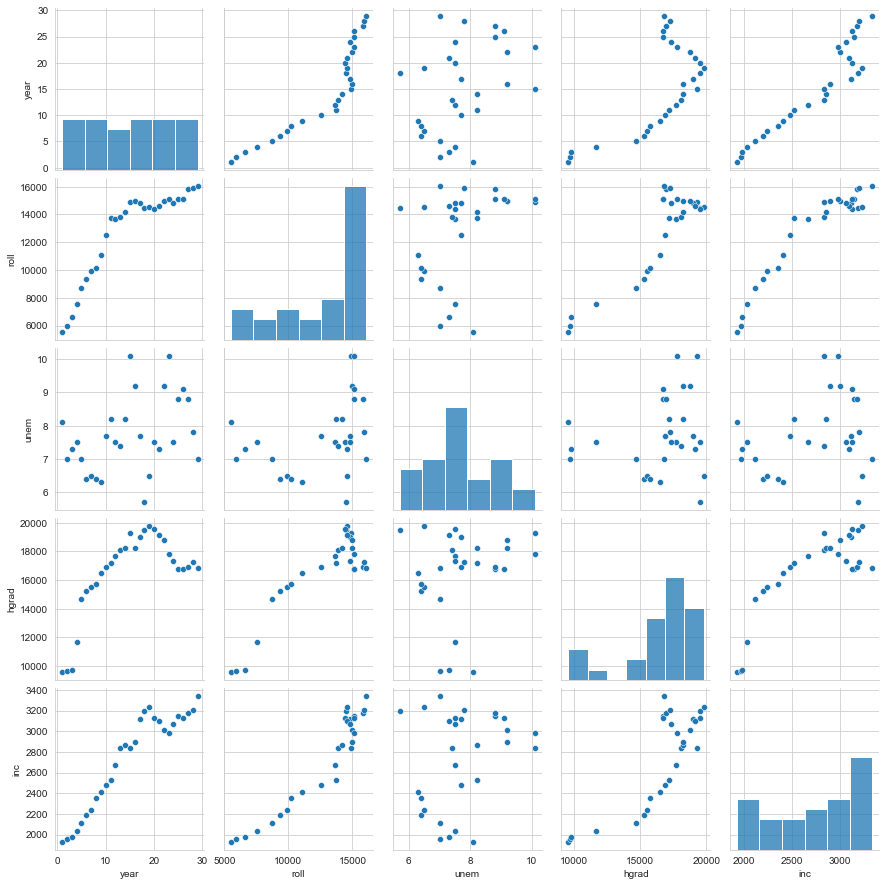

In [67]:
# ---- -------------------- 2.Multiple liner regression ----------------------
import numpy as np
import pandas as pd

import seaborn as sb
sb.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

from pylab import rcParams
rcParams['figure.figsize'] = 10, 8 

from collections import Counter

enrollment = pd.read_csv("C:\\Users\\Asus\\Downloads\\enrollment_forecast.csv")

enrollment.head()
enrollment.columns = ['year', 'roll', 'unem', 'hgrad', 'inc'] # may skip, pandas do it automaticaly while import csv
enrollment.columns

sb.pairplot(enrollment)

print(enrollment.corr())

enrollment_data = enrollment[['unem', 'hgrad']].values  ## values - только значения, т.е. получили ndarray
enrollment_target = enrollment[['roll']].values
enrollment_data_names = ['unem', 'hgrad']

X, y = scale(enrollment_data), enrollment_target

# Missing Values
missing_values = X == np.NAN
X[missing_values == True] 
missing_values

LinReg = LinearRegression()
LinReg.fit(X, y)
print('Score (R2): ',LinReg.score(X, y))
print('intercept: ', LinReg.intercept_)
print('slope: ', LinReg.coef_)


# здесь на оси х значения 1 и 2-го независимого параметра, поэтому точек в 2 раза больше чем наблюдений 

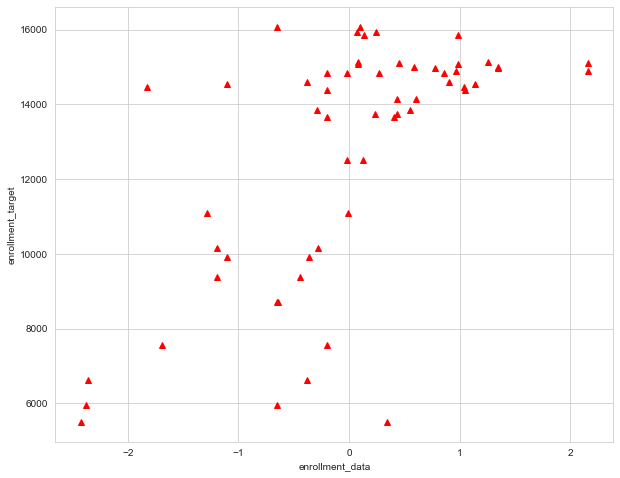

In [68]:
y_pred = LinReg.predict(X)
#print('prediction: ', y_pred, sep='\n')
plt.plot(X, y, 'r^')
plt.xlabel('enrollment_data')
plt.ylabel('enrollment_target')
plt.show()

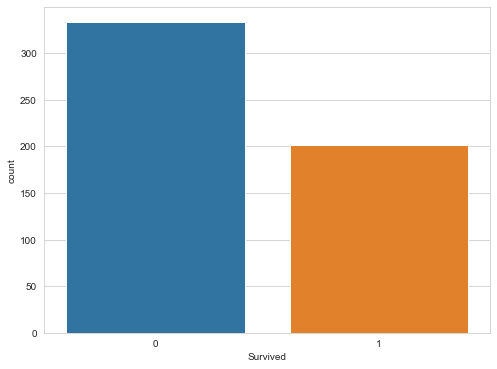

OK  59
NOT OK 119


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[96, 17],
       [23, 42]], dtype=int64)

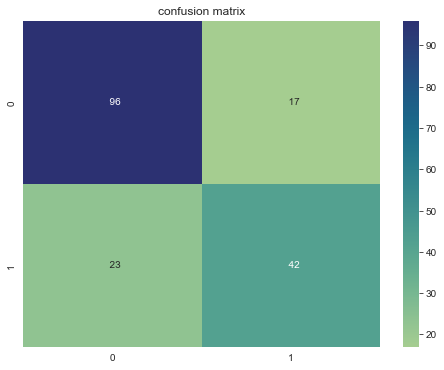

In [19]:
# ---- -------------------- 3. Logistic regression ----------------------
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import seaborn as sb
sb.set_style('whitegrid')

from pylab import rcParams
rcParams['figure.figsize'] = 8, 6

import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score

train_features = pd.read_csv("C:\\Users\\Asus\\Downloads\\titanic\\train_features.csv")
train_labels = pd.read_csv("C:\\Users\\Asus\\Downloads\\titanic\\train_labels.csv")

val_features = pd.read_csv("C:\\Users\\Asus\\Downloads\\titanic\\val_features.csv")
val_labels = pd.read_csv("C:\\Users\\Asus\\Downloads\\titanic\\val_labels.csv")

test_features = pd.read_csv("C:\\Users\\Asus\\Downloads\\titanic\\test_features.csv")
test_labels = pd.read_csv("C:\\Users\\Asus\\Downloads\\titanic\\test_labels.csv")

sb.countplot(x='Survived', data=train_labels)
plt.show()

log_reg = LogisticRegression()

log_reg.fit(train_features, train_labels)

log_reg.score(test_features, test_labels)  

survival = log_reg.predict(test_features)

print("OK ", sum(survival!=0))
print("NOT OK", sum(survival==0))

## Confusion Matrix
conf_mx = confusion_matrix(test_labels, survival)

sb.heatmap(conf_mx, annot=True, fmt='4.0f', cmap='crest')
plt.title('confusion matrix', size=12)
conf_mx

(120, 4) (30, 4) (120,) (30,)
versicolor
setosa


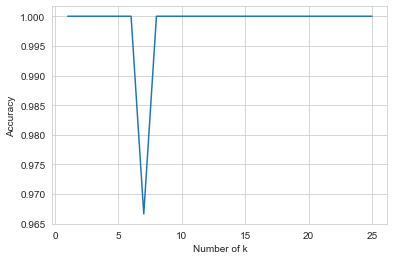

In [21]:
# ============= 4. KNN

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
type(iris)
iris.data
iris.feature_names
iris.target_names
iris.data.shape

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

k_range = range(1, 26)
scores = {}
scores_list = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  y_pred=knn.predict(X_test)
  scores[k] = metrics.accuracy_score(y_test, y_pred)
  scores_list.append(metrics.accuracy_score(y_test, y_pred))

scores

plt.plot(k_range, scores_list)
plt.xlabel('Number of k')
plt.ylabel('Accuracy')

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X,y)

classes = {0:'setosa',1:'versicolor',2:'virginica'}

x_new = [[3,4,5,2],
         [5,4,2,2]]

y_predict = knn.predict(x_new)

print(classes[y_predict[0]])
print(classes[y_predict[1]])